# Commercial Store Data

<h2>Import Libraries</h2>

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px


<h2> Load the Data</h2>

In [129]:
storeData=pd.read_csv("data.csv", low_memory=False)

In [130]:
#to display  max values
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#create dataframe 
df = pd.DataFrame(storeData)

## Inspect data

In [131]:
# show data
df.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [132]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27865 entries, 0 to 27864
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    27865 non-null  object 
 1   StockCode    27865 non-null  object 
 2   Description  27752 non-null  object 
 3   Quantity     27865 non-null  int64  
 4   InvoiceDate  27865 non-null  object 
 5   UnitPrice    27865 non-null  float64
 6   CustomerID   17928 non-null  float64
 7   Country      27865 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.7+ MB


In [133]:
""" 
    InvoiceNo:invoice no: of customer
    StockCode:unique identifier assigned to each product 
    Description:product name
    Quantity:quantity of product 
    InvoiceDate:date of purchase
    UnitPrice:price per unit item
    CustomerID:unique ID of customer
    Country:country of customer
    TotalValue:total amount spend"""
#column information
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [134]:
"""Count: The number of non-null entries.
Mean: The average value.
Standard Deviation (std): The spread of the data.
Min: The minimum value.
25%: The 25th percentile (first quartile).
50%: The 50th percentile (median).
75%: The 75th percentile (third quartile).
Max: The maximum value."""
# Descriptive statistics
df.describe()

,Quantity,UnitPrice,CustomerID
count,27865.000000,27865.000000,17928.000000
mean,7.307088,6.770915,15582.891789
std,67.768182,171.499338,1755.083386
min,-9360.000000,0.000000,12347.000000
25%,1.000000,1.450000,14205.000000
50%,2.000000,2.510000,15628.000000
75%,6.000000,4.250000,17218.000000
max,2880.000000,13541.330000,18269.000000


## Handle Missing Values

In [135]:
# Check for missing values
print(df.isnull().sum())


InvoiceNo         0
StockCode         0
Description     113
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     9937
Country           0
dtype: int64


In [136]:
#  Remove rows with missing values
df = df.dropna()


## Remove Duplicates

In [137]:
# Check for duplicates
print(df.duplicated().sum())

407


In [138]:
# Remove duplicates
df = df.drop_duplicates()

## Convert Data Types

In [139]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype('int')

##  Outliers

In [140]:
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)]
outliers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583,France
44,536370,22492,MINI PAINT SET VINTAGE,36,2010-12-01 08:45:00,0.65,12583,France
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,13748,United Kingdom
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,10.95,15100,United Kingdom
82,536376,22114,HOT WATER BOTTLE TEA AND SYMPATHY,48,2010-12-01 09:32:00,3.45,15291,United Kingdom
83,536376,21733,RED HANGING HEART T-LIGHT HOLDER,64,2010-12-01 09:32:00,2.55,15291,United Kingdom
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,14688,United Kingdom
101,536378,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,48,2010-12-01 09:37:00,1.25,14688,United Kingdom
102,536378,85071B,RED CHARLIE+LOLA PERSONAL DOORSIGN,96,2010-12-01 09:37:00,0.38,14688,United Kingdom


In [141]:
#removing
dfCleaned = df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]

## Store Cleaned Data

In [142]:
dfCleaned.to_csv('cleanedStoreData.csv', index=False)

## cleaned data

In [143]:
cleanedStoreData=pd.read_csv("data.csv", low_memory=False)
df1 = pd.DataFrame(cleanedStoreData)

In [144]:
# Add new column 'Total Value' which is Quantity * Unit Price
df1['TotalValue'] = df1['Quantity'] * df1['UnitPrice']
# data


# "Store data"

In [145]:
df1.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,54.08


In [146]:
# Total rows and columns
df1.shape

(27865, 9)

In [147]:
#to find customer who has spend maximum money in single  item purchase
df1.loc[df1["TotalValue"].argmax()][["CustomerID","Description","TotalValue"]]

CustomerID            NaN
Description    AMAZON FEE
TotalValue       13541.33
Name: 15017, dtype: object

# Product List

In [148]:
#total number of uniqe products 
print(len(df1.Description.unique()))
#product List
print("\n".join(map(str, df1.Description.unique())))

2532
WHITE HANGING HEART T-LIGHT HOLDER
WHITE METAL LANTERN
CREAM CUPID HEARTS COAT HANGER
KNITTED UNION FLAG HOT WATER BOTTLE
RED WOOLLY HOTTIE WHITE HEART.
SET 7 BABUSHKA NESTING BOXES
GLASS STAR FROSTED T-LIGHT HOLDER
HAND WARMER UNION JACK
HAND WARMER RED POLKA DOT
ASSORTED COLOUR BIRD ORNAMENT
POPPY'S PLAYHOUSE BEDROOM 
POPPY'S PLAYHOUSE KITCHEN
FELTCRAFT PRINCESS CHARLOTTE DOLL
IVORY KNITTED MUG COSY 
BOX OF 6 ASSORTED COLOUR TEASPOONS
BOX OF VINTAGE JIGSAW BLOCKS 
BOX OF VINTAGE ALPHABET BLOCKS
HOME BUILDING BLOCK WORD
LOVE BUILDING BLOCK WORD
RECIPE BOX WITH METAL HEART
DOORMAT NEW ENGLAND
JAM MAKING SET WITH JARS
RED COAT RACK PARIS FASHION
YELLOW COAT RACK PARIS FASHION
BLUE COAT RACK PARIS FASHION
BATH BUILDING BLOCK WORD
ALARM CLOCK BAKELIKE PINK
ALARM CLOCK BAKELIKE RED 
ALARM CLOCK BAKELIKE GREEN
PANDA AND BUNNIES STICKER SHEET
STARS GIFT TAPE 
INFLATABLE POLITICAL GLOBE 
VINTAGE HEADS AND TAILS CARD GAME 
SET/2 RED RETROSPOT TEA TOWELS 
ROUND SNACK BOXES SET OF4 WOODLAND

# Countries List

In [149]:
#total number of uniqe countries 
print(len(df1.Country.unique()))
#Country List
print("\n".join(df1.Country.unique()))

18
United Kingdom
France
Australia
Netherlands
Germany
Norway
EIRE
Switzerland
Spain
Poland
Portugal
Italy
Belgium
Lithuania
Japan
Iceland
Channel Islands
Denmark


### Total money spend by customers(country wise)

In [150]:
salesByCountry = df1.groupby('Country')['TotalValue'].sum().sort_values(ascending=False)

# to dataframe
salesByCountrydf = salesByCountry.reset_index()
salesByCountrydf.columns = ['Country', 'TotalExpense']

# Print the DataFrame
salesByCountrydf

,Country,TotalExpense
0,United Kingdom,424884.28
1,Germany,7831.14
2,Japan,7705.07
3,France,7335.17
4,EIRE,6431.33
5,Norway,3787.12
6,Portugal,1976.47
7,Spain,1675.73
8,Lithuania,1661.06
9,Denmark,1281.50


### total quantity of products sold overall

In [165]:
totalProductsSold = df1.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(100)
# show data
totalProductsSold


Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS      4020
MINI PAINT SET VINTAGE                 2302
WHITE HANGING HEART T-LIGHT HOLDER     2218
CREAM HEART CARD HOLDER                2169
BLACK HEART CARD HOLDER                2131
PACK OF 72 RETROSPOT CAKE CASES        2056
RED  HARMONICA IN BOX                  1901
ASSORTED COLOUR T-LIGHT HOLDER         1884
PAPER CHAIN KIT 50'S CHRISTMAS         1785
ASSORTED COLOUR BIRD ORNAMENT          1733
ASSORTED LAQUERED INCENSE HOLDERS      1729
ROUND SNACK BOXES SET OF 4 FRUITS      1642
HAND WARMER BIRD DESIGN                1579
SMALL POPCORN HOLDER                   1537
JUMBO BAG RED RETROSPOT                1530
REGENCY CAKESTAND 3 TIER               1474
ANTIQUE SILVER TEA GLASS ETCHED        1450
ASSORTED INCENSE PACK                  1440
RED WOOLLY HOTTIE WHITE HEART.         1347
BLACK RECORD COVER FRAME               1262
HEART OF WICKER SMALL                  1260
WOOD BLACK BOARD ANT WHITE FINISH      1231
PAPER CHAIN KIT VINT

###  total amount spend  by customer over all

In [152]:
CustomerTotalSpending = df1.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(100)
# show data
CustomerTotalSpending

CustomerID
18102.0    27834.61
15061.0    17344.78
13777.0     6798.16
14911.0     5567.63
17850.0     5391.21
16210.0     5277.74
16029.0     4271.52
12755.0     3794.40
12433.0     3787.12
13798.0     3743.70
17381.0     3603.72
12753.0     3590.59
12748.0     3410.38
17511.0     3394.36
13089.0     3230.62
15032.0     2770.60
17340.0     2404.15
13081.0     2366.78
12471.0     2343.41
16873.0     2157.64
17450.0     2028.84
16754.0     2002.40
12567.0     1942.38
14031.0     1898.12
15299.0     1835.01
14733.0     1830.02
13767.0     1821.46
14667.0     1685.70
14680.0     1680.88
16422.0     1668.20
15332.0     1661.06
17677.0     1616.60
15311.0     1593.04
15856.0     1571.32
13408.0     1537.83
17017.0     1533.62
17841.0     1532.06
13013.0     1528.34
12472.0     1509.00
18092.0     1485.72
13174.0     1415.97
17937.0     1393.56
13488.0     1381.92
12967.0     1368.40
17857.0     1335.20
17949.0     1314.00
15513.0     1313.50
12429.0     1281.50
17827.0     1271.80
17809.0  

## Customers from each country

In [153]:
customerCounts = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
customerCounts

Country
United Kingdom     646
Germany             16
France              10
Portugal             5
Spain                3
Japan                3
EIRE                 2
Italy                2
Australia            2
Iceland              1
Belgium              1
Lithuania            1
Netherlands          1
Norway               1
Poland               1
Denmark              1
Channel Islands      1
Switzerland          1
Name: CustomerID, dtype: int64

### daily sales amount

In [168]:
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])
dailySales = df1.groupby(df1['InvoiceDate'].dt.to_period('D'))['TotalValue'].sum()
dailySalesdf = dailySales.reset_index()
dailySalesdf.columns = ['Date', 'TotalExpense']
# Extracting the day from the date for ploting graph
dailySalesdf['Day'] = dailySalesdf['Date'].dt.day
dailySalesdf


,Date,TotalExpense,Day
0,2010-12-01,58635.56,1
1,2010-12-02,46207.28,2
2,2010-12-03,45620.46,3
3,2010-12-05,31383.95,5
4,2010-12-06,53860.18,6
5,2010-12-07,45059.05,7
6,2010-12-08,44189.84,8
7,2010-12-09,52532.13,9
8,2010-12-10,57404.91,10
9,2010-12-12,17240.92,12


# Visualizations

## Graph to show Total Expense by Country in Log Scale

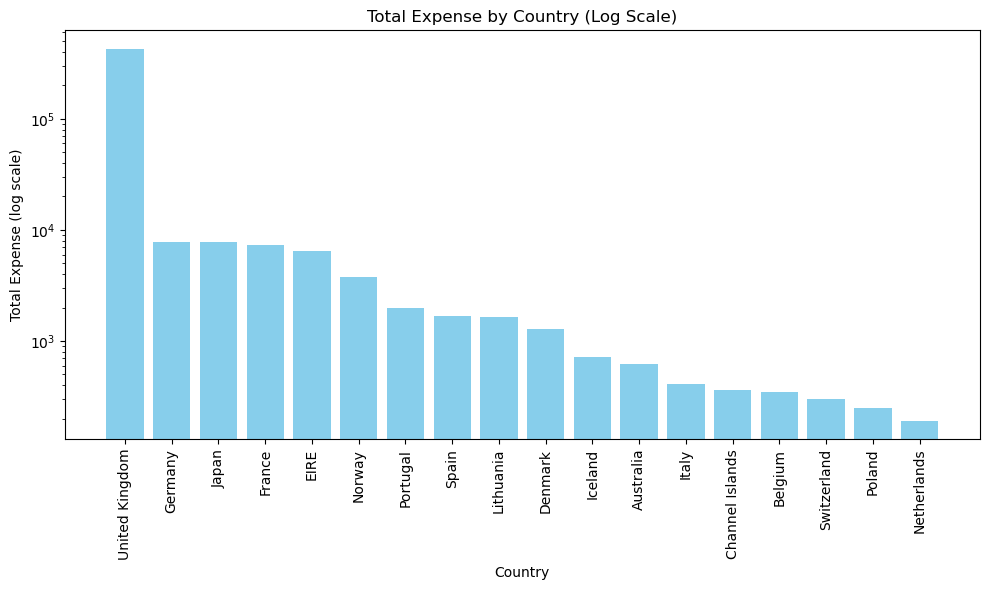

In [155]:
plt.figure(figsize=(10, 6))
plt.bar(salesByCountrydf['Country'], salesByCountrydf['TotalExpense'], color='skyblue')
plt.yscale('log')
plt.xlabel('Country')
plt.ylabel('Total Expense (log scale)')
plt.title('Total Expense by Country (Log Scale)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Graph to show daily  Expense

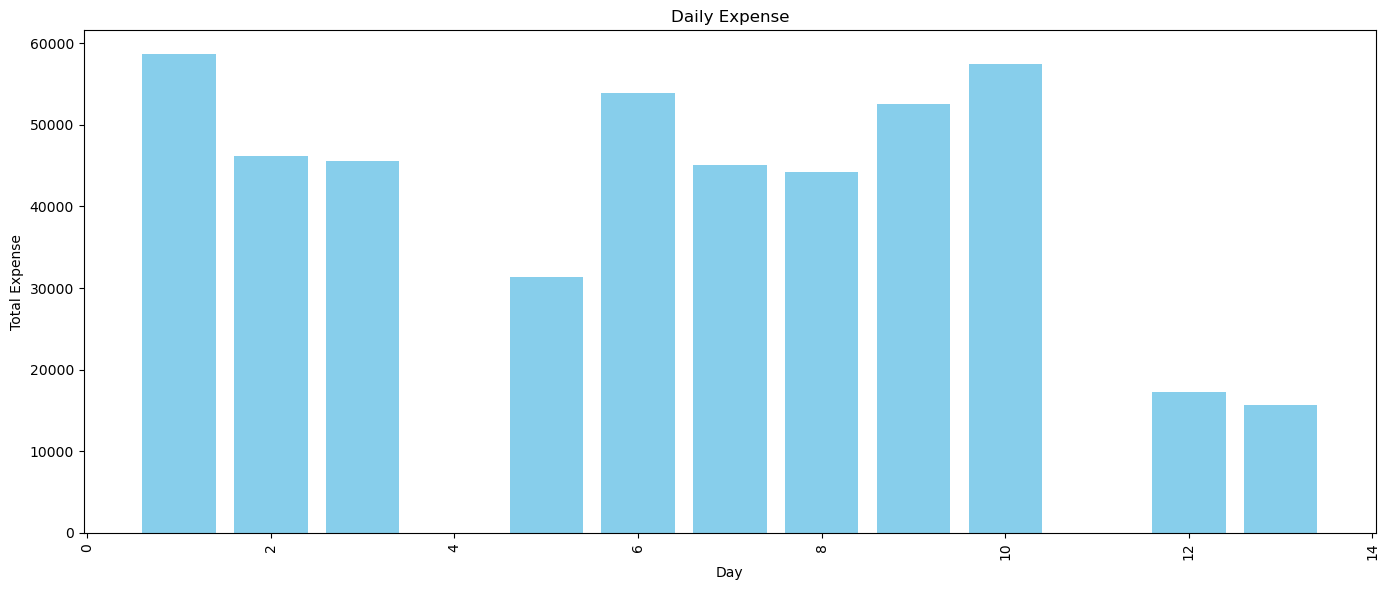

In [156]:
plt.figure(figsize=(14, 6))
plt.bar(dailySalesdf['Day'], dailySalesdf['TotalExpense'], color='skyblue')
plt.xlabel('Day')
plt.ylabel('Total Expense')
plt.title('Daily Expense')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Graph to show customer total spending

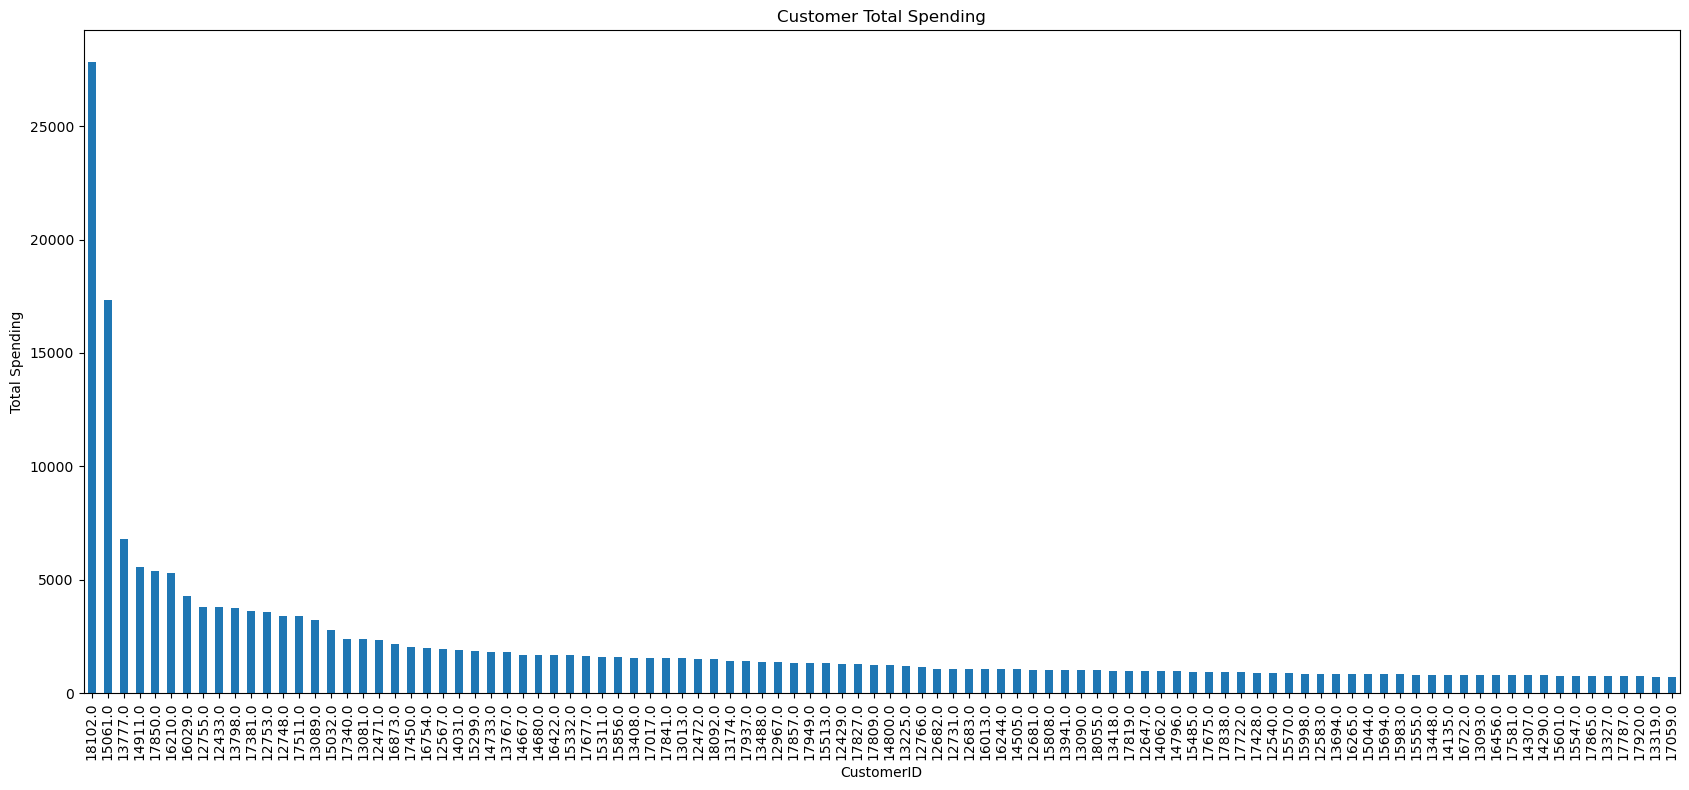

In [157]:
plt.figure(figsize=(17,8))
CustomerTotalSpending.plot(kind='bar')
plt.title('Customer Total Spending')
plt.xlabel('CustomerID')
plt.ylabel('Total Spending')
plt.tight_layout()
plt.show()

## Graph to show customer total quantity of product sold

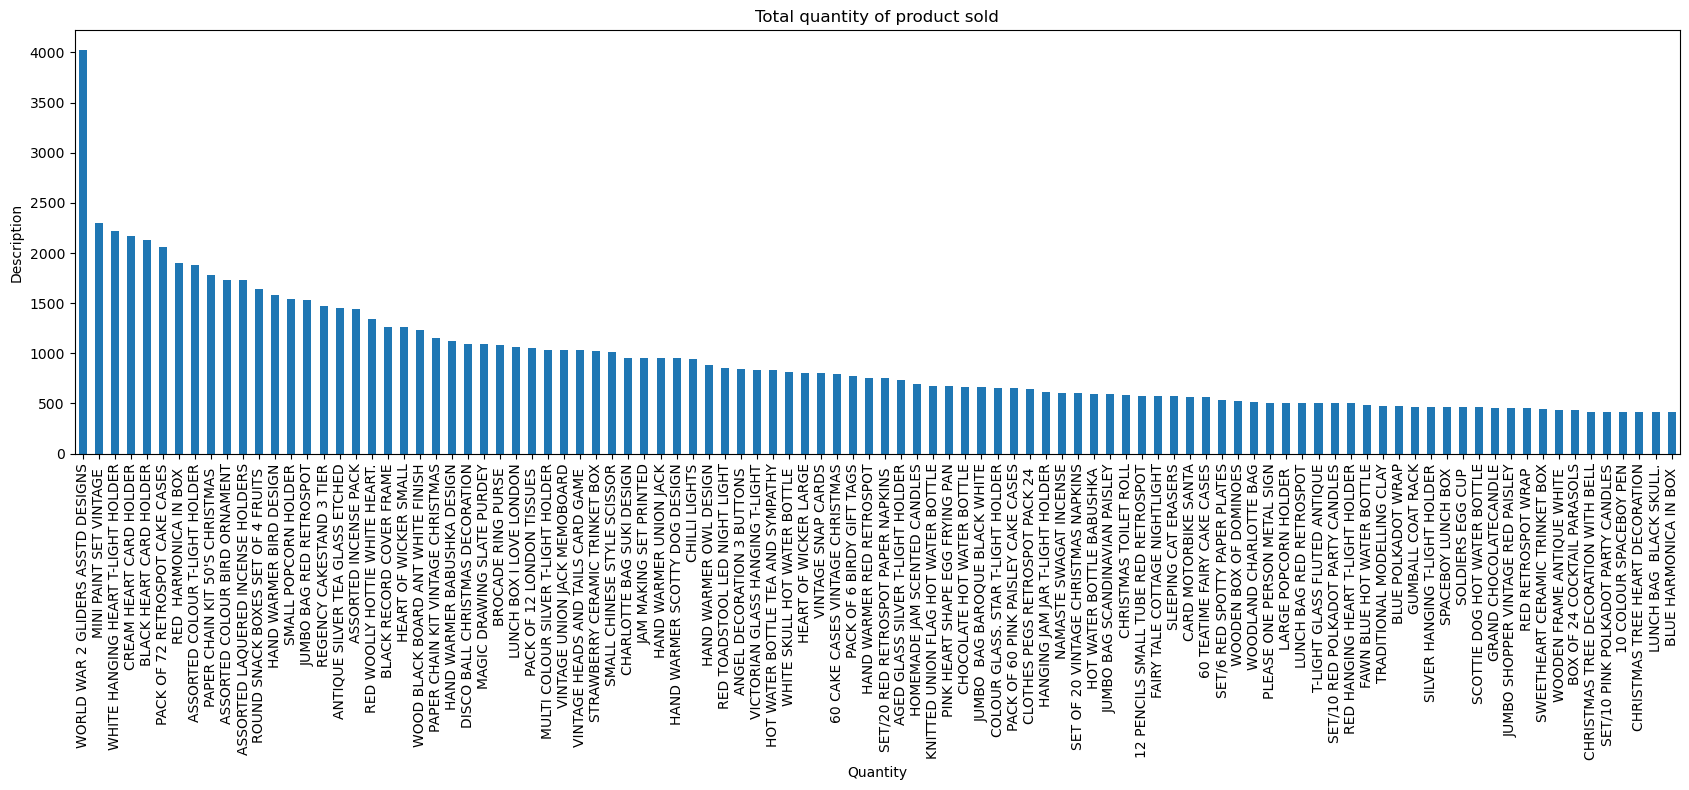

In [158]:
plt.figure(figsize=(17,8))
totalProductsSold.plot(kind='bar')
plt.title('Total quantity of product sold')
plt.xlabel('Quantity')
plt.ylabel('Description')
plt.tight_layout()
plt.show()

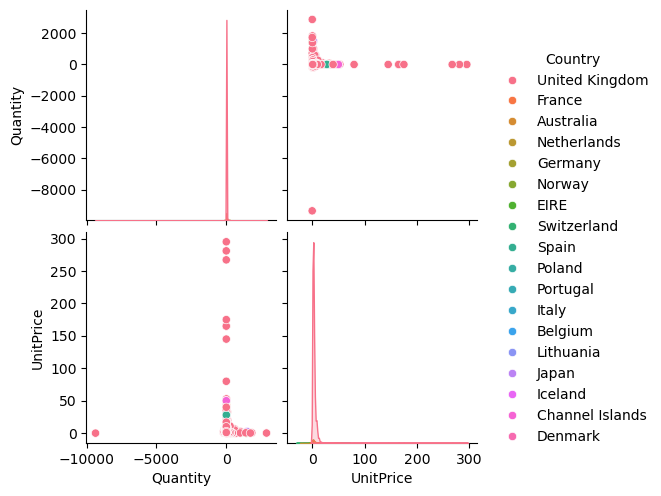

In [159]:
# pairwise relationships between quantity and unit price with respect to country
sns.pairplot(df, vars=['Quantity', 'UnitPrice'], hue='Country')

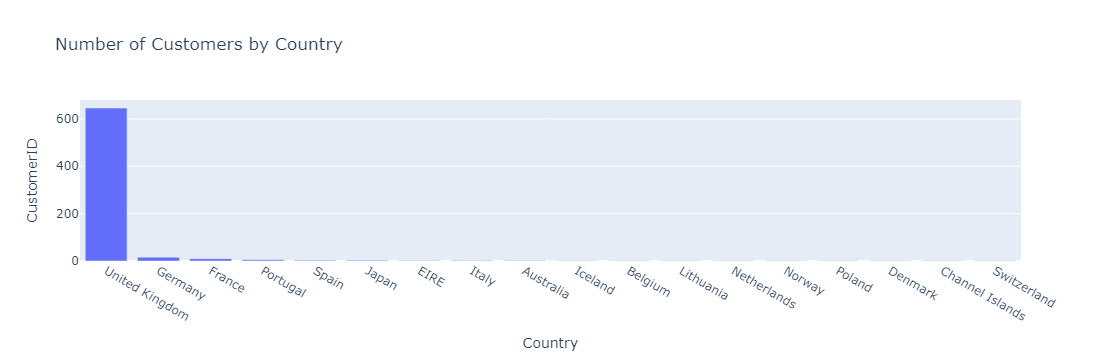

In [160]:
customerCounts = customerCounts.reset_index()
fig = px.bar(customerCounts, x='Country', y='CustomerID', title='Number of Customers by Country')
fig.show()

<Axes: xlabel='Quantity', ylabel='Count'>

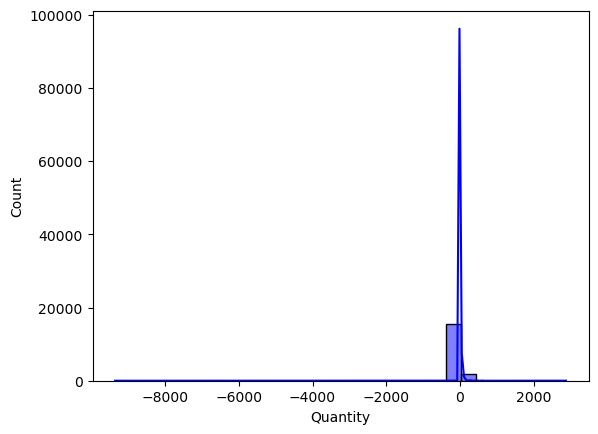

In [161]:
#  distribution of a quantity  variable
sns.histplot(df['Quantity'], bins=30, kde=True, color='blue')

<Axes: xlabel='Quantity', ylabel='UnitPrice'>

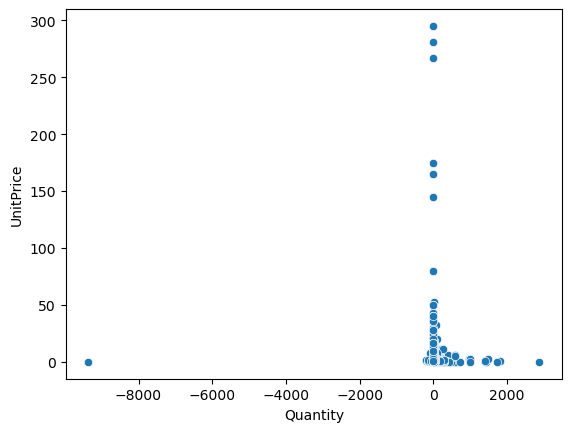

In [162]:
# relationships between quantity and unitprice variables
sns.scatterplot(x='Quantity', y='UnitPrice', data=df)